In [269]:
import numpy as np 
import pandas
import tensorflow as tf 
from sklearn.preprocessing import StandardScaler #, PolynomialFeatures
import matplotlib.pyplot as plot
import seaborn

## 1. Loading Data
Just Loading the data from the source (This his experimental and used only in Jupyter Notebook)

In [270]:
data_path = "~/.cache/kagglehub/datasets/rizkykiky/gold-price-dataset/versions/1/Daily.csv"
data_path_1 = "~/.cache/kagglehub/datasets/sahilwagh/gold-stock-prices/versions/3/goldstock v1.csv"
data_path_2 = "~/.cache/kagglehub/datasets/sahilwagh/gold-stock-prices/versions/3/goldstock v2.csv"


In [274]:
data = pandas.read_csv(data_path_2)
data.describe()

,Unnamed: 0,Close/Last,Volume,Open,High,Low
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1259.864596,1541.176902,190261.189168,1541.136041,1551.244843,1530.976344
std,728.488698,333.631989,96871.355690,333.699364,336.375007,330.790580
min,0.000000,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,630.500000,1251.300000,133774.000000,1250.650000,1258.500000,1243.900000
50%,1259.000000,1409.700000,181273.000000,1404.600000,1418.900000,1401.400000
75%,1888.500000,1832.050000,238157.500000,1833.000000,1844.000000,1819.450000
max,2528.000000,2438.500000,787217.000000,2431.500000,2454.200000,2411.100000


## 2. Data Cleaning
* Handling missing values [Not aplication for this data]
* Checking out about the currect naming in header


In [275]:

data_temp = data.copy()
data_temp.rename(columns={'Unnamed: 0':'Index', 'Close/Last':'Close'}, inplace=True)

data_temp.describe()
# data_temp.describe(), data_temp.shape, data_temp.columns.values

,Index,Close,Volume,Open,High,Low
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1259.864596,1541.176902,190261.189168,1541.136041,1551.244843,1530.976344
std,728.488698,333.631989,96871.355690,333.699364,336.375007,330.790580
min,0.000000,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,630.500000,1251.300000,133774.000000,1250.650000,1258.500000,1243.900000
50%,1259.000000,1409.700000,181273.000000,1404.600000,1418.900000,1401.400000
75%,1888.500000,1832.050000,238157.500000,1833.000000,1844.000000,1819.450000
max,2528.000000,2438.500000,787217.000000,2431.500000,2454.200000,2411.100000


Adding `diff` does not sounds greate after normalization. So commented it out for now.

In [103]:
# data_temp["diff"] = data_temp.Close - data_temp.Open

# print(data_temp.shape)
# data_temp.describe()

## 3. Feature Creation
[Need to implement]

In [278]:
data_temp.Date.agg(['min', 'max'])

min    2014-07-07
max    2024-07-03
Name: Date, dtype: object

For extracting which frequencies are important for features, using Fast Fourier Transform. [This should be done for datasets with timeframe lower than 1Day]

/var/folders/qz/1m239zsj3yn94cx9gr3qvx800000gq/T/ipykernel_73590/3913866395.py:12: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plot.xlim([-10000000000, max(plot.xlim())])


(0.06999512826476571, 179.29819276175905)

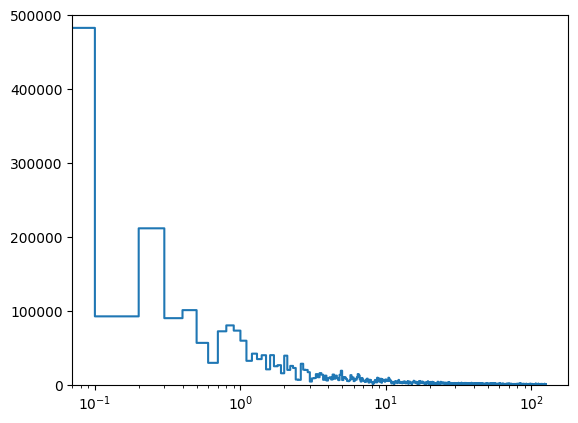

In [ ]:
# _fft = tf.signal.rfft(data_temp.Close)
# f_per_dataset = np.arange(0, len(_fft))

# n_samples_d = len(data_temp.Close)
# years_per_dataset = 10 #n_samples_d / 0

# f_per_year = f_per_dataset / years_per_dataset

# plot.step(f_per_year, np.abs(_fft))
# plot.xscale('log')
# plot.ylim(0, 500000)
# plot.xlim([-10000000000, max(plot.xlim())])
# plot.xticks([1,3])

## 4. Data Transformation


### Normalize Using StandardScaler
This function use StandardScaler to normalize the passed columns.


<Caption>
It turns out that the method below (`normalized_using_scaler`) does not working as expected. 
The values for `High_norm` is not always greater than `Low_norm`!</Caption>

In [85]:
def normalize_using_scaler(data, columns):
    scaler = StandardScaler()
    data_normalized = scaler.fit_transform(data[columns])

    columns_header_for_normalzied = [f"{col}_norm" for col in columns]
    data[columns_header_for_normalzied] = data_normalized

    return data, scaler

In this method, normalization is fited based on the `base_column`. Other mentioned `columns` only transformed based on the __fitted__ model.
✅

In [88]:
def normalize_using_scaler_based_on(data,base_column, columns):
    _scaler = StandardScaler()
    normalized_close = _scaler.fit_transform(data[base_column].values.reshape(-1, 1))

    data[f'{base_column}_norm_base'] = normalized_close

    for col in columns:
        _normalized_col = _scaler.transform(data[col].values.reshape(-1,1))
        data[f'{col}_norm'] = _normalized_col
        

    return data, _scaler
    

In [ ]:
# Normalizing Data
cols_to_normalize = ['Volume', 'Open', 'High', 'Low'] #, 'diff']
data_normalized, temp_scaler = normalize_using_scaler_based_on(data_temp, base_column='Close', columns=cols_to_normalize)


In [97]:
data_temp.describe()

,Index,Close,Volume,Open,High,Low,diff,Close_norm_base,Volume_norm,Open_norm,High_norm,Low_norm,diff_norm
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2.511000e+03,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1259.864596,1541.176902,190261.189168,1541.136041,1551.244843,1530.976344,0.040860,-4.527552e-16,565.765899,-0.000122,0.030183,-0.030580,-4.620189
std,728.488698,333.631989,96871.355690,333.699364,336.375007,330.790580,13.876893,1.000199e+00,290.411753,1.000401,1.008423,0.991681,0.041602
min,0.000000,1049.600000,1.000000,1051.500000,1062.700000,1045.400000,-101.600000,-1.473704e+00,-4.617314,-1.468008,-1.434431,-1.486295,-4.924900
25%,630.500000,1251.300000,133774.000000,1250.650000,1258.500000,1243.900000,-6.100000,-8.690253e-01,396.422304,-0.870974,-0.847440,-0.891210,-4.638599
50%,1259.000000,1409.700000,181273.000000,1404.600000,1418.900000,1401.400000,0.300000,-3.941561e-01,538.820103,-0.409445,-0.366575,-0.419039,-4.619413
75%,1888.500000,1832.050000,238157.500000,1833.000000,1844.000000,1819.450000,6.700000,8.720118e-01,709.354801,0.874860,0.907837,0.834238,-4.600226
max,2528.000000,2438.500000,787217.000000,2431.500000,2454.200000,2411.100000,73.500000,2.690095e+00,2355.386601,2.669110,2.737162,2.607952,-4.399965


In [98]:

data_normalized.describe()

,Index,Close,Volume,Open,High,Low,diff,Close_norm_base,Volume_norm,Open_norm,High_norm,Low_norm,diff_norm
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2.511000e+03,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1259.864596,1541.176902,190261.189168,1541.136041,1551.244843,1530.976344,0.040860,-4.527552e-16,565.765899,-0.000122,0.030183,-0.030580,-4.620189
std,728.488698,333.631989,96871.355690,333.699364,336.375007,330.790580,13.876893,1.000199e+00,290.411753,1.000401,1.008423,0.991681,0.041602
min,0.000000,1049.600000,1.000000,1051.500000,1062.700000,1045.400000,-101.600000,-1.473704e+00,-4.617314,-1.468008,-1.434431,-1.486295,-4.924900
25%,630.500000,1251.300000,133774.000000,1250.650000,1258.500000,1243.900000,-6.100000,-8.690253e-01,396.422304,-0.870974,-0.847440,-0.891210,-4.638599
50%,1259.000000,1409.700000,181273.000000,1404.600000,1418.900000,1401.400000,0.300000,-3.941561e-01,538.820103,-0.409445,-0.366575,-0.419039,-4.619413
75%,1888.500000,1832.050000,238157.500000,1833.000000,1844.000000,1819.450000,6.700000,8.720118e-01,709.354801,0.874860,0.907837,0.834238,-4.600226
max,2528.000000,2438.500000,787217.000000,2431.500000,2454.200000,2411.100000,73.500000,2.690095e+00,2355.386601,2.669110,2.737162,2.607952,-4.399965


In [102]:
# data_temp.Open_norm[10]
data_temp.to_csv("Assets/temp_dataframe.csv")


In [101]:
data_temp["diff_2"] = data_temp.Close_norm_base - data_temp.Open_norm
data_temp.describe()

,Index,Close,Volume,Open,High,Low,diff,Close_norm_base,Volume_norm,Open_norm,High_norm,Low_norm,diff_norm,diff_2
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2.511000e+03,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1259.864596,1541.176902,190261.189168,1541.136041,1551.244843,1530.976344,0.040860,-4.527552e-16,565.765899,-0.000122,0.030183,-0.030580,-4.620189,0.000122
std,728.488698,333.631989,96871.355690,333.699364,336.375007,330.790580,13.876893,1.000199e+00,290.411753,1.000401,1.008423,0.991681,0.041602,0.041602
min,0.000000,1049.600000,1.000000,1051.500000,1062.700000,1045.400000,-101.600000,-1.473704e+00,-4.617314,-1.468008,-1.434431,-1.486295,-4.924900,-0.304588
25%,630.500000,1251.300000,133774.000000,1250.650000,1258.500000,1243.900000,-6.100000,-8.690253e-01,396.422304,-0.870974,-0.847440,-0.891210,-4.638599,-0.018287
50%,1259.000000,1409.700000,181273.000000,1404.600000,1418.900000,1401.400000,0.300000,-3.941561e-01,538.820103,-0.409445,-0.366575,-0.419039,-4.619413,0.000899
75%,1888.500000,1832.050000,238157.500000,1833.000000,1844.000000,1819.450000,6.700000,8.720118e-01,709.354801,0.874860,0.907837,0.834238,-4.600226,0.020086
max,2528.000000,2438.500000,787217.000000,2431.500000,2454.200000,2411.100000,73.500000,2.690095e+00,2355.386601,2.669110,2.737162,2.607952,-4.399965,0.220346


/var/folders/qz/1m239zsj3yn94cx9gr3qvx800000gq/T/ipykernel_73590/2194873706.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plot.legend()


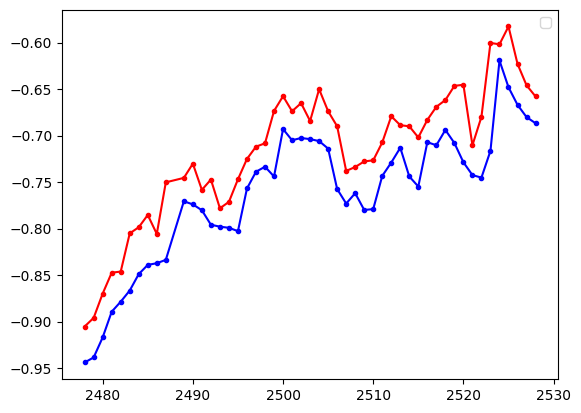

In [104]:
plot_range = range(len(data_temp.Date) - 50, len(data_temp.Date))
plot.plot(data_temp.Index[plot_range], data_temp.High_norm[plot_range], marker=".", color='red')
plot.plot(data_temp.Index[plot_range], data_temp.Low_norm[plot_range], marker= ".", color='blue')
plot.legend()
plot.show()

Manually checking the data, and make sure all the `High_norm` is greater than `Low_norm`.

In [106]:
high2low_proportion_for_norm_params = data_temp_2.High_norm < data_temp_2.Low_norm
high2low_proportion = data_temp_2.High < data_temp_2.Low
print(high2low_proportion_for_norm_params.sum() / len(high2low_proportion_for_norm_params),
      high2low_proportion.sum() / len(high2low_proportion))

0.0 0.0


In [112]:
data_temp.High[plot_range].values , data_temp.Low[plot_range].values, data_temp.High_norm[plot_range].values, data_temp.Low_norm[plot_range].values
# data_temp.High[plot_range]

(array([1239.2, 1242.3, 1251. , 1258.5, 1258.9, 1272.6, 1274.8, 1279.2,
        1272.4, 1290.9, 1292.5, 1297.6, 1288.2, 1291.9, 1281.6, 1283.9,
        1292. , 1299.3, 1303.7, 1304.9, 1316.5, 1321.8, 1316.4, 1319.3,
        1312.9, 1324.3, 1316.4, 1311. , 1295. , 1296.4, 1298.4, 1298.8,
        1305.2, 1314.6, 1311.4, 1311. , 1307. , 1313.3, 1318. , 1320.4,
        1325.5, 1325.9, 1304.2, 1314.4, 1340.9, 1340.4, 1346.8, 1333.4,
        1325.7, 1321.7]),
 array([1226.3, 1228.1, 1235.3, 1244.5, 1248.1, 1252.1, 1258. , 1261.3,
        1261.9, 1263.1, 1284.1, 1283. , 1280.9, 1275.7, 1275. , 1274.6,
        1273.4, 1288.7, 1294.7, 1296.5, 1293. , 1310. , 1306. , 1306.8,
        1306.4, 1305.7, 1303. , 1288.5, 1283.3, 1287. , 1281. , 1281.3,
        1293.2, 1298. , 1303.3, 1293. , 1289.4, 1305.3, 1304.2, 1309.7,
        1305. , 1298.1, 1293.5, 1292.6, 1302.2, 1334.6, 1325. , 1318.7,
        1314.3, 1312.1]),
 array([-0.90530003, -0.89600651, -0.86992468, -0.84744034, -0.84624118,
        -0.

## 5. Sequence Creation
Time sereis to supervised learning

In [137]:
def add_lookback_window(data, 
                        lookback_length,
                        from_column = 'Close_norm_base',
                        as_column = 'lookback_close'):
    data[as_column] = np.zeros(len(data))
    for i in range(lookback_length, len(data)):
        data.loc[i,as_column] = data.loc[i - lookback_length, from_column]
    return data
    

In [138]:
add_lookback_window(data_temp, lookback_length=40, from_column='Close_norm_base', as_column='y_1')
data_temp.describe()

,Index,Close,Volume,Open,High,Low,diff,Close_norm_base,Volume_norm,Open_norm,High_norm,Low_norm,diff_norm,diff_2,y_1
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2.511000e+03,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1259.864596,1541.176902,190261.189168,1541.136041,1551.244843,1530.976344,0.040860,-4.527552e-16,565.765899,-0.000122,0.030183,-0.030580,-4.620189,0.000122,0.011388
std,728.488698,333.631989,96871.355690,333.699364,336.375007,330.790580,13.876893,1.000199e+00,290.411753,1.000401,1.008423,0.991681,0.041602,0.041602,0.996039
min,0.000000,1049.600000,1.000000,1051.500000,1062.700000,1045.400000,-101.600000,-1.473704e+00,-4.617314,-1.468008,-1.434431,-1.486295,-4.924900,-0.304588,-1.473704
25%,630.500000,1251.300000,133774.000000,1250.650000,1258.500000,1243.900000,-6.100000,-8.690253e-01,396.422304,-0.870974,-0.847440,-0.891210,-4.638599,-0.018287,-0.869025
50%,1259.000000,1409.700000,181273.000000,1404.600000,1418.900000,1401.400000,0.300000,-3.941561e-01,538.820103,-0.409445,-0.366575,-0.419039,-4.619413,0.000899,-0.207686
75%,1888.500000,1832.050000,238157.500000,1833.000000,1844.000000,1819.450000,6.700000,8.720118e-01,709.354801,0.874860,0.907837,0.834238,-4.600226,0.020086,0.872012
max,2528.000000,2438.500000,787217.000000,2431.500000,2454.200000,2411.100000,73.500000,2.690095e+00,2355.386601,2.669110,2.737162,2.607952,-4.399965,0.220346,2.690095


## 6. Data Splitting
Split the data as:
* **Training set**: Olders 70% of data
* **Validation set**:  Next 10% of data
* **Test set**: Most recent 20% of data.


In [145]:
_train_size = int(0.7 * len(data_temp))
_valid_size = int(0.1 * len(data_temp))

data_temp_train = data_temp[:_train_size]
data_temp_validation = data_temp[_train_size:_train_size + _valid_size]
data_temp_test = data_temp[_train_size + _valid_size:]

data_temp_train.shape, data_temp_validation.shape, data_temp_test.shape

((1757, 14), (251, 14), (503, 14))

In [146]:
data_temp_train.describe()

,Index,Close,Volume,Open,High,Low,Close_norm_base,Volume_norm,Open_norm,High_norm,Low_norm,diff_2,y_1
count,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000
mean,881.032442,1680.374388,203923.364257,1680.364257,1691.088219,1669.366534,0.417302,606.723891,0.417271,0.449421,0.384301,0.000030,0.436335
std,509.243812,303.858651,103939.472336,303.900761,307.140548,300.653159,0.910941,311.601342,0.911068,0.920780,0.901332,0.045485,0.893007
min,0.000000,1182.300000,1.000000,1180.700000,1189.000000,1167.100000,-1.075881,-4.617314,-1.080678,-1.055795,-1.121449,-0.304588,-1.075881
25%,442.000000,1332.800000,146441.000000,1334.600000,1341.700000,1327.300000,-0.624696,434.396849,-0.619299,-0.598014,-0.641184,-0.019486,-0.571033
50%,881.000000,1763.900000,196788.000000,1765.000000,1776.000000,1753.500000,0.667704,585.332700,0.671002,0.703979,0.636526,0.001499,0.667704
75%,1321.000000,1905.000000,256446.000000,1903.500000,1915.600000,1890.300000,1.090709,764.182106,1.086213,1.122487,1.046640,0.021585,1.090709
max,1762.000000,2438.500000,787217.000000,2431.500000,2454.200000,2411.100000,2.690095,2355.386601,2.669110,2.737162,2.607952,0.220346,2.690095


In [147]:
data_temp_validation.describe()

,Index,Close,Volume,Open,High,Low,Close_norm_base,Volume_norm,Open_norm,High_norm,Low_norm,diff_2,y_1
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,1888.000000,1259.385657,191405.992032,1259.778088,1267.079681,1252.024701,-0.844785,569.197917,-0.843609,-0.821719,-0.866853,-0.001176,-0.883150
std,72.601653,58.250510,76608.050057,58.704158,58.859727,57.832673,0.174630,229.664156,0.175990,0.176456,0.173377,0.026102,0.141310
min,1763.000000,1129.800000,3479.000000,1130.000000,1137.300000,1124.300000,-1.233272,5.809422,-1.232672,-1.210787,-1.249760,-0.135805,-1.233272
25%,1825.500000,1222.800000,144601.000000,1222.600000,1231.000000,1217.200000,-0.954466,428.880692,-0.955065,-0.929883,-0.971254,-0.017388,-0.968556
50%,1888.000000,1256.400000,190379.000000,1257.100000,1262.600000,1251.100000,-0.853736,566.119085,-0.851637,-0.835149,-0.869625,0.000300,-0.863929
75%,1950.500000,1310.800000,227198.500000,1313.950000,1320.150000,1306.200000,-0.690650,676.500689,-0.681206,-0.662619,-0.704440,0.013341,-0.799624
max,2013.000000,1372.600000,783657.000000,1370.500000,1377.500000,1360.600000,-0.505379,2344.714036,-0.511674,-0.490689,-0.541354,0.107925,-0.561140


In [148]:
data_temp_test.describe()

,Index,Close,Volume,Open,High,Low,Close_norm_base,Volume_norm,Open_norm,High_norm,Low_norm,diff_2,y_1
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,2269.697813,1195.569781,141967.377734,1195.205368,1204.566203,1186.772167,-1.036100,420.985325,-1.037192,-1.009129,-1.062474,0.001092,-1.026591
std,149.493208,68.477753,56712.237436,68.307578,69.157064,67.840561,0.205290,170.018270,0.204780,0.207327,0.203380,0.032792,0.222082
min,2014.000000,1049.600000,390.000000,1051.500000,1062.700000,1045.400000,-1.473704,-3.451126,-1.468008,-1.434431,-1.486295,-0.099531,-1.473704
25%,2139.500000,1149.650000,107639.500000,1151.250000,1158.500000,1140.350000,-1.173763,318.073385,-1.168966,-1.147231,-1.201644,-0.016189,-1.173763
50%,2268.000000,1200.400000,136394.000000,1200.700000,1208.900000,1191.300000,-1.021619,404.276832,-1.020720,-0.996137,-1.048900,-0.001199,-1.021619
75%,2398.500000,1243.150000,174155.500000,1241.800000,1250.650000,1231.500000,-0.893458,517.482468,-0.897505,-0.870974,-0.928384,0.016788,-0.893458
max,2528.000000,1339.200000,527205.000000,1345.000000,1362.600000,1338.500000,-0.605509,1575.893631,-0.588121,-0.535358,-0.607607,0.204158,-0.505379


TypeError: unhashable type: 'dict'

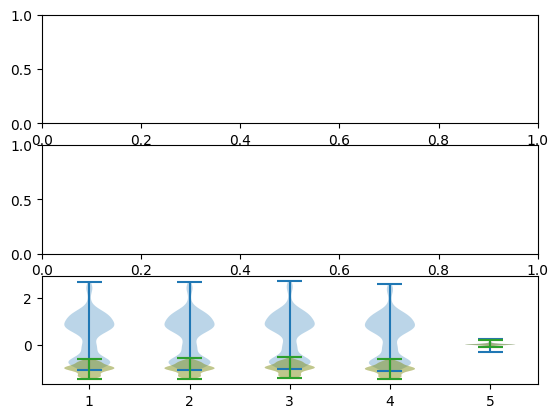

In [ ]:
_normalized_feature_columns = ['Close_norm_base', 'Open_norm', 'High_norm', 'Low_norm', #'Volume_norm',
                                'diff_2']


#a1 = seaborn.violinplot(data=data_temp_train[_normalized_feature_columns])
#a2 = seaborn.violinplot(dat=data_temp_validation[_normalized_feature_columns])
_fig, _axs = plot.subplots(3,1)

#_axs[0,0] = seaborn.violinplot(data=data_temp_train[_normalized_feature_columns])
# _axs[0] = plot.violinplot(dataset=data_temp_train)
# _axs[1]. (seaborn.violinplot(data=data_temp_train[_normalized_feature_columns]))

# fig = plot.figure()
# fig.add_subplot(seaborn.violinplot(data=data_temp_train[_normalized_feature_columns]))

# fig.add_subplot(seaborn.violinplot(data=data_temp_validation[_normalized_feature_columns]))
# _axs[0].plot(seaborn.violinplot(data=data_temp_train[_normalized_feature_columns]))
_axs[0] = plot.violinplot(dataset=data_temp_train[_normalized_feature_columns])

# _axs[1] = seaborn.violinplot(data=data_temp_validation[_normalized_feature_columns])
_axs[1] = plot.violinplot(dataset=data_temp_test[_normalized_feature_columns])
_axs[2].plot()

_fig.tight_layout(pad=1.0)
plot.show()

# Feature Engineering Techniques
*[Implement if needed]* 

# Model Training and Evaluation

## 1. Model Training Methodology


In [152]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Normalization
from tensorflow.keras.optimizers import Adam


The network structure contains:
 1. Input Layer
 2. LSTM Layers
 3. Dense Layers
 4. Optional Attention Mechanism

In [ ]:
_features = ['Close_norm_base', 'Open_norm', 'High_norm', 'Low_norm', 'Volume_norm', 'diff_2']

_number_of_features = len(_features)
_sequence_length = 7
_data_length = len(data_temp_train / _sequence_length)

model = Sequential([
    # Input Layer (sequence of historical prices and technical indicators)
    # tf.keras.Input(shape=(_sequense_length, _number_of_features)),
    # tf.keras.Input(shape=(_number_of_features,)),
    tf.keras.Input(shape=(_sequence_length, _number_of_features, ))

    # Normalization Layer (Min-Max scaling or Z-score normalization)
    # Normalization(axis=1, input_shape=(_sequense_length, _number_of_features)), 

    # LSTM Layer 1 (128 units, return sequences=True)
    LSTM(128, return_sequences=True),
    
    # Dropout Layer (20% dropout rate to prevent overfitting)
    Dropout(0.2),

    # LSTM Layer 2 (64 units, return sequences=False)
    LSTM(64, return_sequences=False),

    # Dropout Layer (20% dropout rate)  
    Dropout(0.2),

    # Dense Layer 1 (32 units, activation='relu')
    Dense(32, activation='relu'),
    
    # Dense Layer 2 (1 unit, activation='linear') → Output (predicted price)
    Dense(1, activation='linear')
])
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                  │ (None, 40, 128)        │        69,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 40, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,641 (471.25 KB)

 Trainable params: 120,641 (471.25 KB)

 Non-trainable params: 0 (0.00 B)

In [209]:
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=Adam(learning_rate=0.001)
)

In [210]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True)
    

In [215]:
model_history = model.fit(
    data_temp_train[_features].values, # .reshape(-1, _sequense_length, _number_of_features),
    data_temp_train['y_1'].values,
    # validation_data=(
        # data_temp_validation[_features].values.reshape(-1, _sequense_length, _number_of_features),
        # data_temp_validation['y_1'].values
    # ),
    epochs=100,
    batch_size=32,
    # callbacks=[early_stopping]
)

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 6), dtype=float32). Expected shape (None, 40, 6), but input has incompatible shape (None, 6)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 6), dtype=float32)
  • training=True
  • mask=None

In [212]:
data_temp_train[_features].values.reshape(-1,_number_of_features).shape

(1757, 6)

In [204]:
data_temp_train[_features].values.reshape(_number_of_features,-1).shape

(6, 1757)

In [214]:
data_temp_train['y_1'].values.shape

(1757,)